# Overview: 

This notebook is created to do tasks given in this issue: [Visualization for misclassifications](https://github.com/mozilla/PRESC/issues/7)


In [1]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *
%matplotlib inline

#importing libraries for Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics


import graphviz

In [2]:
df = pd.read_csv("../../datasets/defaults.csv")

In [3]:
df = df.rename(columns={'defaulted': 'def_pay','pay_0': 'pay_1'})

In [4]:
y = df['def_pay'].copy()

In [5]:
# creating the features, which now will be everything in the original df
features = ['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
X = df[features].copy()
X.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'],
      dtype='object')

# Visualization for misclassifications

Misclassification errors on the minority class are more important than other types of prediction errors for some imbalanced classification tasks.

I will use decision tree and in a confusion show the misclassified values.
 


## Decision tree

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
#createing the classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 
# training the classifier
classifier.fit(X_train, y_train)
# doing predictions on the test
predictions = classifier.predict(X_test)


# see how good we did on the test
accuracy_score(y_true = y_test, y_pred = predictions)

0.812

This digits do not give the correct result. Thats why we need to see misclassification. 
Here I am adding misclassification to check the misclassified values.

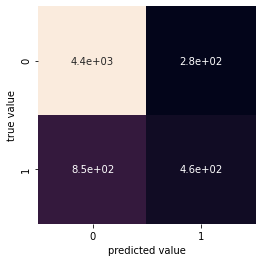

In [8]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, predictions)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

A confusion matrix is showing the frequency of misclassification of our classifier. 